In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data collection and processing**

In [3]:
data = pd.read_csv("gld_price_data.csv")
data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


**No of rows and column**

In [6]:
data.shape

(2290, 6)

**Basic** **info**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Check missing values**

In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**statistical measure**

In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1.positive correlation(directional propositional)


2.negative correlation(inversely propositional)

In [15]:
corre = data.corr(numeric_only=True)

**Constructing heat map to understand correlation**

<Axes: >

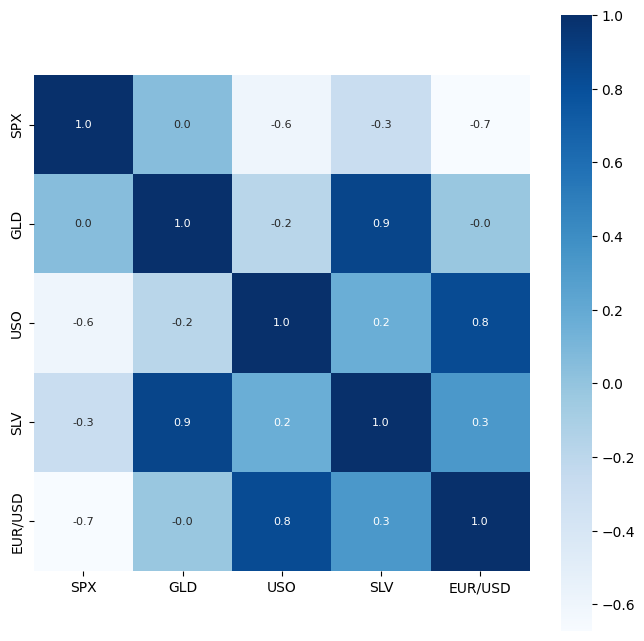

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(corre,cbar=True,square=True,fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

**Correlation values of gold**

In [19]:
print(corre['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


**Check the distribution of gold price**

<ipython-input-20-954563e299eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

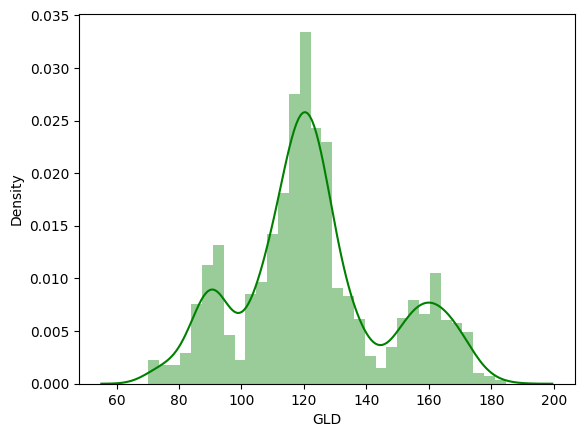

In [20]:
sns.distplot(data['GLD'],color='green')

**Splitting the data**

In [21]:
x = data.drop(['Date','GLD'],axis=1)
y = data['GLD']


In [22]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Spliting the data into train and test**

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

**Model training Random forest Regessor**

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

**Value prediction**

In [26]:
x_pred = regressor.predict(x_test)

In [27]:
print(x_pred)

[168.47269902  82.23340004 116.31350044 127.66160065 120.93590096
 154.54339797 150.11539878 126.17940107 117.57949859 125.85010117
 116.71770084 171.77860125 141.70589893 167.87609832 115.13009977
 117.41340029 138.91190261 169.95670034 159.61200336 157.07139924
 155.05109975 125.03380034 176.59319923 157.26410401 125.22640033
  93.84279983  77.69079977 120.92920005 119.20159974 167.3649996
  88.03520048 125.06479996  91.30570076 117.66620046 121.17939885
 136.08600138 115.31200117 115.20760091 148.39789978 107.30300081
 103.8240025   87.07759789 126.47450085 117.92939963 153.26959869
 119.67460003 108.45549974 108.10399788  93.20660072 126.96179819
  74.98350031 113.78139929 121.50720026 111.26149898 118.85629884
 120.74019931 159.3391004  166.82470078 146.97009643  85.94429864
  94.37990031  86.90429903  90.50770026 119.08900042 126.40340007
 127.6065     169.60489925 122.3577994  117.31369879  98.18060052
 168.29070194 142.86519814 131.59650251 121.21820222 121.39119937
 119.862300

**R square error**

In [29]:
from sklearn import metrics
error_score = metrics.r2_score(y_test, x_pred)
print("R squared error : ", error_score)

R squared error :  0.9890010987565193


**Compareing the values in a plot**

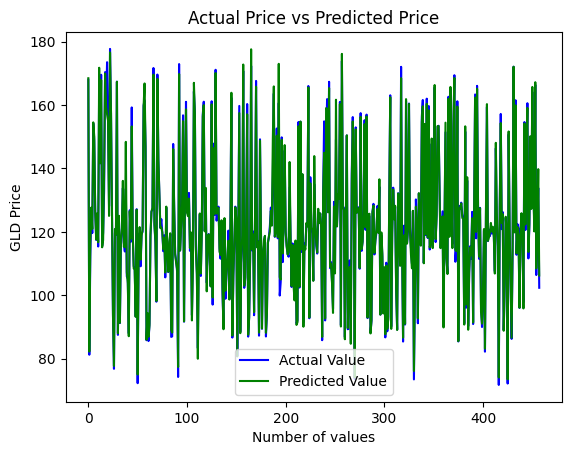

In [31]:
y_test = list(y_test)
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(x_pred, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()